Found 234 normal images in the specified directory.
The dimensions of the first image are: (1442, 770)


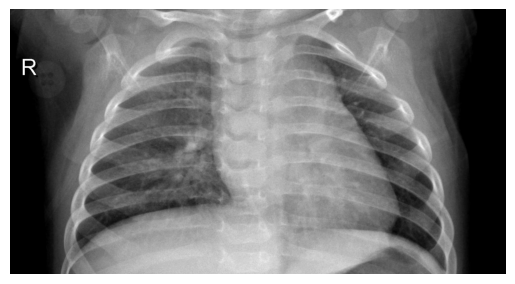

In [12]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# If we want to import the pictures from google drive into colab, we can also do that...

# Set the path to your image directory
normal_images_dir = '../../data/test/NORMAL'  # Adjust this to match your folder structure

# List all files in the folder
normal_images = [f for f in os.listdir(normal_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of images found
print(f"Found {len(normal_images)} normal images in the specified directory.")

# Load the first image
if normal_images:
    first_image_path = os.path.join(normal_images_dir, normal_images[0])
    first_image = Image.open(first_image_path)
    print(f"The dimensions of the first image are: {first_image.size}")
    
    # Display the first image
    plt.imshow(first_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
else:
    print("No images found in the specified directory.")


Found 390 pneumonia images in the specified directory.
The dimensions of the first pneumonia image are: (856, 480)


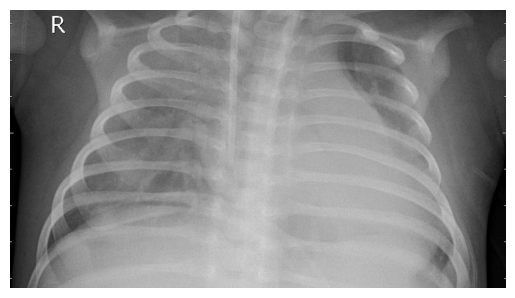

In [13]:
# Now let's import the images with pneumonia
pneumonia_images_dir = '../../data/test/PNEUMONIA'

# List all the pneumonia images
pneumonia_images = [f for f in os.listdir(pneumonia_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of pneumonia images found
print(f"Found {len(pneumonia_images)} pneumonia images in the specified directory.")

# Load the first pneumonia image
if pneumonia_images:
    first_pneumonia_image_path = os.path.join(pneumonia_images_dir, pneumonia_images[0])
    first_pneumonia_image = Image.open(first_pneumonia_image_path)
    print(f"The dimensions of the first pneumonia image are: {first_pneumonia_image.size}")
    
    # Display the first pneumonia image
    plt.imshow(first_pneumonia_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

We can see that both images are not of the same dimension and we can see it in the sample pictures, so these will need to be scaled once we feed them into the pretrained models

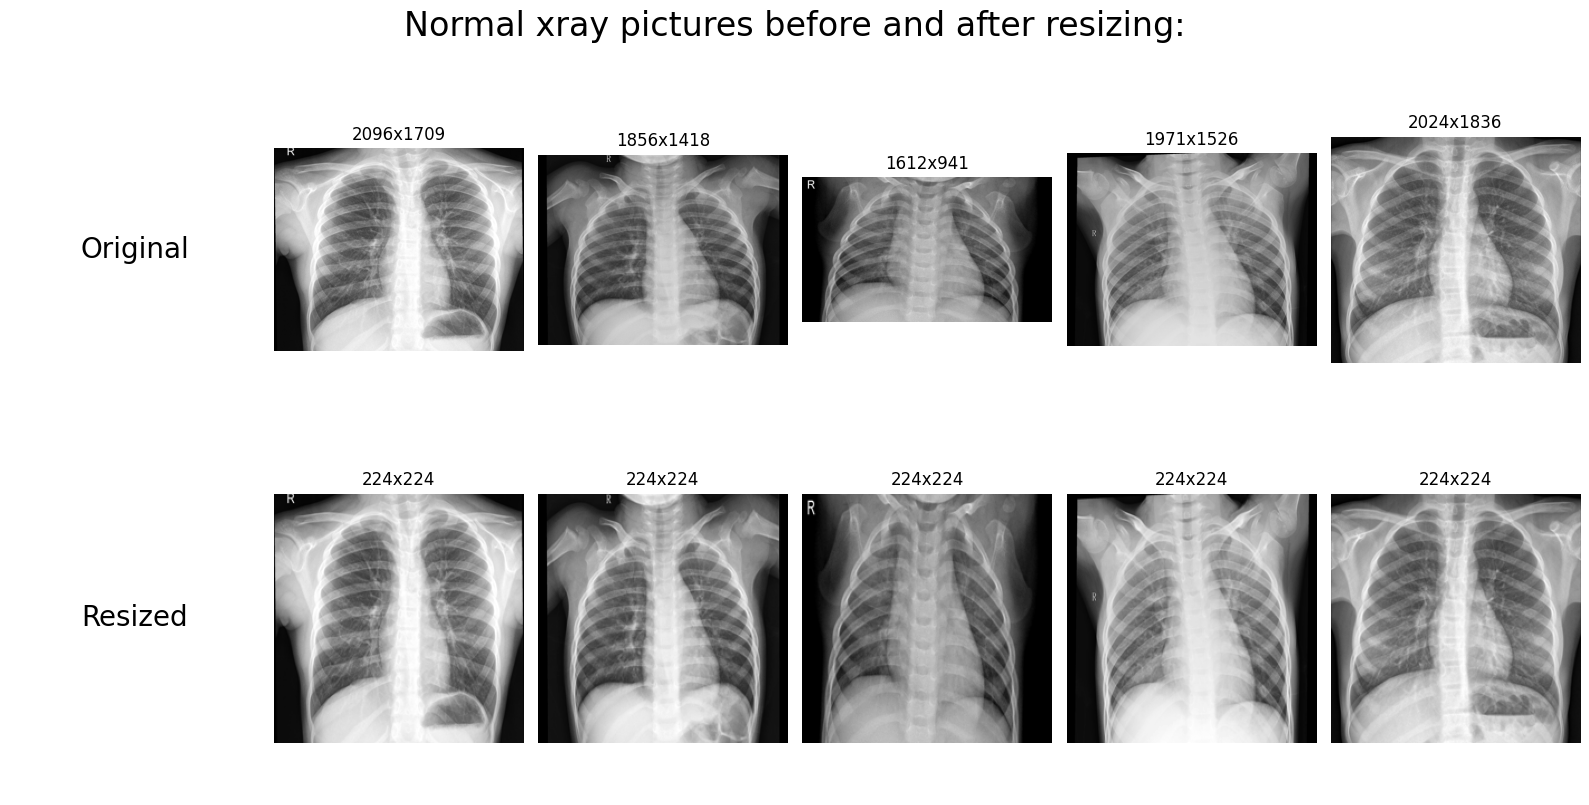

In [14]:
# Let's see how the images look like before and after resizing
sample_size = 5
image_size = (224, 224)  # Resize target

# Randomly sample images from each category
sampled_normal_images = np.random.choice(normal_images, sample_size, replace=False)
sampled_pneumonia_images = np.random.choice(pneumonia_images, sample_size, replace=False)

# Define the figure layout
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Normal xray pictures before and after resizing:", fontsize=24, y=1)

# Function to open, resize, and return an image
def load_and_resize_image(image_path, size):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    resized_image = image.resize(size)  # Resize image to target dimensions
    return image, resized_image

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

As we can observe from the resizing of the images, they look recognizable and there doesn't appear to be much of a significant loss of information following the resizing of the images.

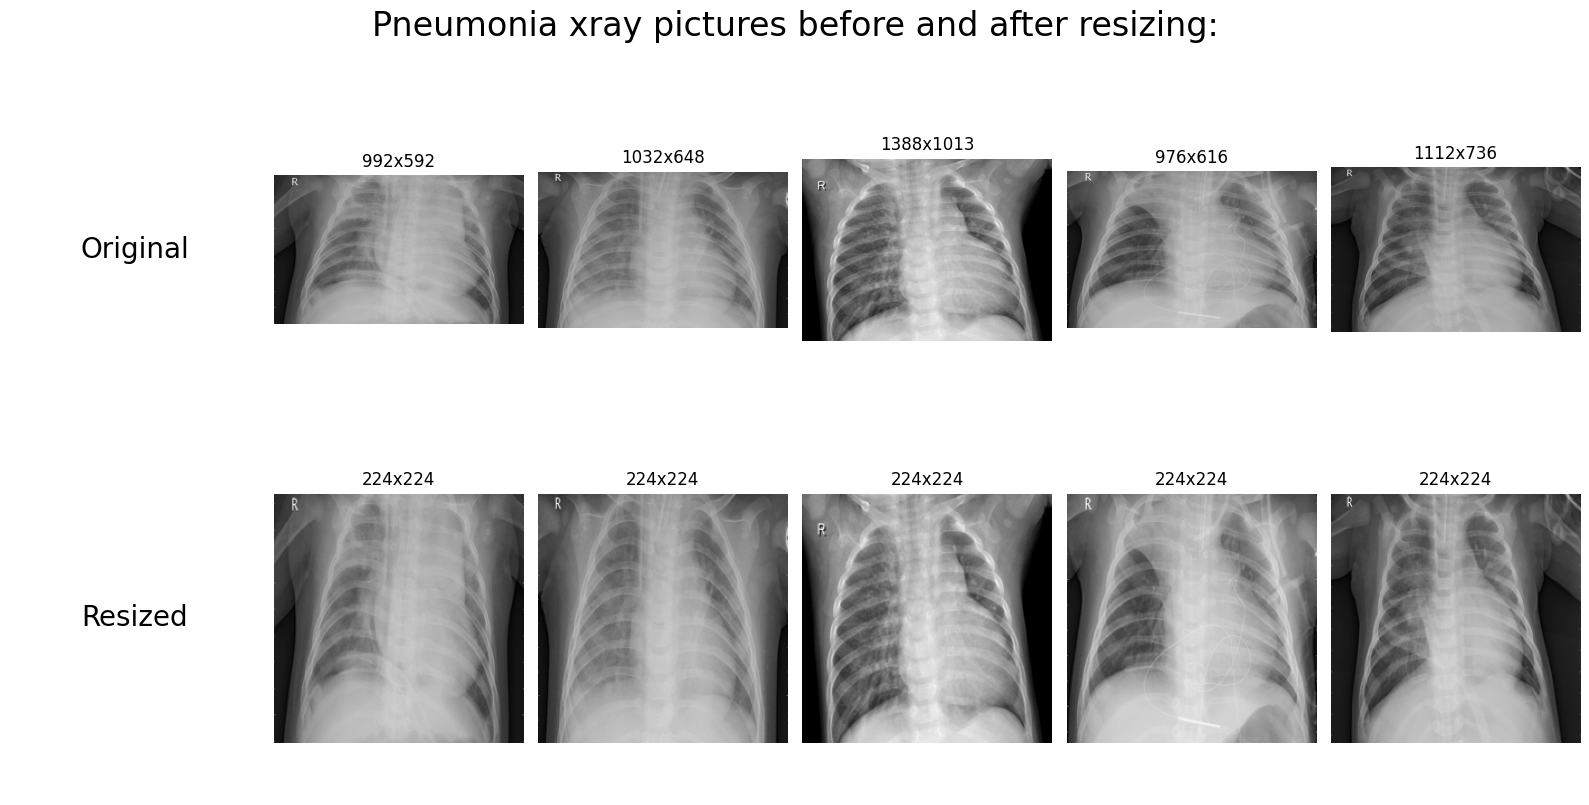

In [15]:
# Let's see how the pneumonia images look like before and after resizing
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Pneumonia xray pictures before and after resizing:", fontsize=24, y=1)

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

Pneumonia images seem to retain most of their information as well!

Load the data

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import os
import math
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# CPU configuration
num_cores = math.floor(os.cpu_count() * 0.75)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
train_dir = '../../data/train'
test_dir = '../../data/test'

# Define transforms for grayscale images to be compatible with ResNet
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
    transforms.Resize((224, 224)),               # Resize to ResNet input size
    transforms.ToTensor(),                       # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

def print_class_distribution(dataset, dataset_name):
    # If the dataset is a Subset, use the indices to fetch labels
    if isinstance(dataset, Subset):
        targets = np.array([dataset.dataset.samples[i][1] for i in dataset.indices])
        classes = dataset.dataset.classes  # Access classes from the original dataset
        root = dataset.dataset.root  # Access root from the original dataset
    else:
        targets = np.array([label for _, label in dataset.samples])
        classes = dataset.classes
        root = dataset.root
    
    # Get class counts
    class_counts = np.bincount(targets)
    
    print(f"Class distribution in {dataset_name} dataset:")
    for idx, count in enumerate(class_counts):
        print(f"Class {classes[idx]}: {count} samples")
    print(f"Directory: {root}")
    print()

# Print class distribution for the train and test datasets
print_class_distribution(train_dataset, "train")
print_class_distribution(test_dataset, "test")

def stratified_subsample(dataset, N_train_samples, random_state=None):
    """
    Subsample the dataset with a stratified approach, ensuring that the
    total number of samples equals N_train_samples.

    Args:
        dataset: PyTorch dataset (e.g., ImageFolder).
        N_train_samples: Total number of samples in the subsample.
        random_state: Seed for reproducibility (None for random, integer for fixed seed).

    Returns:
        A subset of the dataset with the desired stratified sampling.
    """
    # Extract the labels (class labels)
    targets = np.array([label for _, label in dataset.samples]) 
    
    # Get class counts
    class_counts = np.bincount(targets)
    
    # Calculate the total number of classes
    n_classes = len(class_counts)
    
    # Compute the proportion of each class in the dataset
    class_proportions = class_counts / class_counts.sum()
    
    # Calculate the number of samples to take from each class
    N_samples_per_class = (class_proportions * N_train_samples).astype(int)

    # Ensure the total number of samples equals N_train_samples
    while N_samples_per_class.sum() != N_train_samples:
        # Adjust the last class to match the total number of samples
        N_samples_per_class[-1] = N_train_samples - N_samples_per_class[:-1].sum()

    # Stratified Shuffle Split to sample from the dataset with a random_state parameter
    sss = StratifiedShuffleSplit(n_splits=1, train_size=N_train_samples, random_state=random_state)
    
    for train_idx, _ in sss.split(np.zeros(len(targets)), targets):
        # Subset the dataset based on the computed indices
        return Subset(dataset, train_idx)

# Example Usage with random_state set
random_state_value = 42  # Or any integer you prefer for reproducibility

# Set desired number of samples per class
n_train_samples = 1000  # Adjust as needed
n_test_samples = 500    # Adjust as needed

print("-"*100)
# Apply stratified 
if (n_train_samples != 0):
    train_dataset = stratified_subsample(train_dataset, n_train_samples, random_state=random_state_value)
else:
    print("!!! Using all of the training dataset !!!")
    
if (n_test_samples != 0):
    test_dataset = stratified_subsample(test_dataset, n_test_samples, random_state=random_state_value)
else:
    print("!!! Using all of the test dataset !!!")
    
# Print class distribution after subsampling
print_class_distribution(train_dataset, "train (after subsampling)")
print_class_distribution(test_dataset, "test (after subsampling)")

# Create DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_cores, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)

if (type(train_dataset) == Subset):
    print(f"Classes = {train_dataset.dataset.classes}\n")
    num_classes = train_dataset.dataset.classes
else:
    print(f"Classes = {train_dataset.classes}\n")
    num_classes = train_dataset.classes

# Move a batch of data to GPU
for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    print(f"Images batch shape: {images.shape}")
    print(f"Labels batch shape: {labels.shape}")
    break

Class distribution in train dataset:
Class NORMAL: 1341 samples
Class PNEUMONIA: 3875 samples
Directory: ../../data/train

Class distribution in test dataset:
Class NORMAL: 234 samples
Class PNEUMONIA: 390 samples
Directory: ../../data/test

----------------------------------------------------------------------------------------------------
Class distribution in train (after subsampling) dataset:
Class NORMAL: 257 samples
Class PNEUMONIA: 743 samples
Directory: ../../data/train

Class distribution in test (after subsampling) dataset:
Class NORMAL: 187 samples
Class PNEUMONIA: 313 samples
Directory: ../../data/test

Classes = ['NORMAL', 'PNEUMONIA']

Images batch shape: torch.Size([128, 3, 224, 224])
Labels batch shape: torch.Size([128])


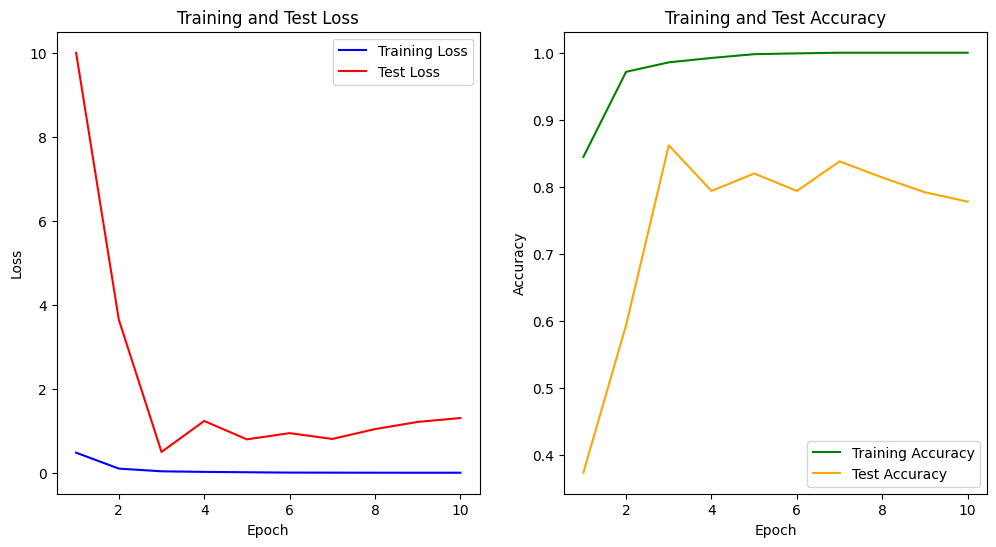

Final Test Accuracy: 77.80%


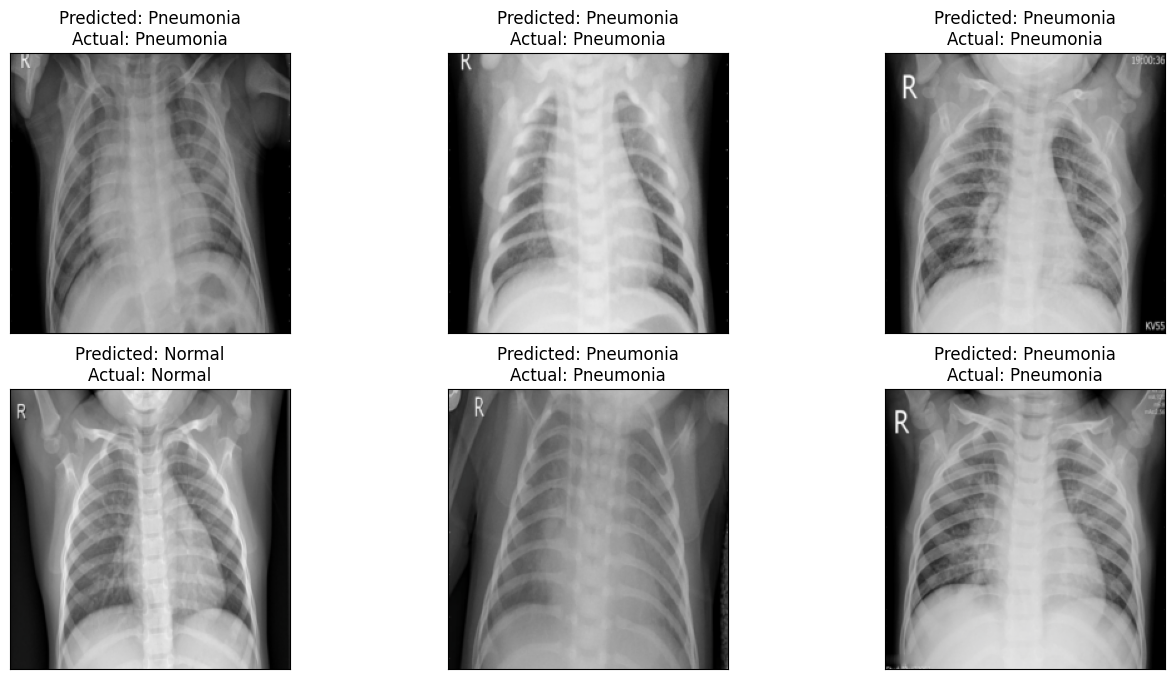

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from torchvision.models import ResNet18_Weights

# Hyperparameters
num_classes = 2
learning_rate = 0.001
epochs = 10

# Load the pre-trained ResNet-18 model with the updated weights argument
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)  # or ResNet18_Weights.DEFAULT
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists for tracking metrics
train_losses = []
train_accs = []
test_losses = []
test_accs = []

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop with real-time plotting
for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_acc += acc

    # Average metrics for training
    avg_train_loss = running_loss / len(train_loader)
    avg_train_acc = running_acc / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # Testing
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average metrics for testing
    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = correct / total
    test_losses.append(avg_test_loss)
    test_accs.append(avg_test_acc)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.2f}, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.2f}")

    # Real-time plotting
    clear_output(wait=True)
    fig = plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accs) + 1), train_accs, label='Training Accuracy', color='green')
    plt.plot(range(1, len(test_accs) + 1), test_accs, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

# Final Test Evaluation
final_test_accuracy = 100 * test_accs[-1]
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
num_classes = 2
batch_size = 32
learning_rate = 0.001
epochs = 4
image_size = (224, 224)
num_samples = 100  # Use only up to 100 images for quick testing
num_samples_train = 1000  # Use up to 1000 images for training

# Define data transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization for RGB images
])

# Load datasets using ImageFolder
train_dir = '../../data/train'
test_dir = '../../data/test'

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Helper function to sample from dataset
def sample_subset(dataset, num_samples):
    num_samples = min(len(dataset), num_samples)
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    return Subset(dataset, indices)

# Create subsets
train_subset = sample_subset(train_dataset, num_samples_train)
test_subset = sample_subset(test_dataset, num_samples)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

# Print class names
class_names = train_dataset.classes
print(f"Class names: {class_names}")

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists for tracking metrics
train_losses = []
train_accs = []
test_losses = []
test_accs = []

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop with real-time plotting
for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate metrics
        acc = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_acc += acc

    # Average metrics for training
    avg_train_loss = running_loss / len(train_loader)
    avg_train_acc = running_acc / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # Testing
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average metrics for testing
    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = correct / total
    test_losses.append(avg_test_loss)
    test_accs.append(avg_test_acc)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.2f}, "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.2f}")

    # Real-time plotting
    clear_output(wait=True)
    fig = plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accs) + 1), train_accs, label='Training Accuracy', color='green')
    plt.plot(range(1, len(test_accs) + 1), test_accs, label='Test Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()

# Final Test Evaluation
final_test_accuracy = 100 * test_accs[-1]
print(f"Final Test Accuracy: {final_test_accuracy:.2f}%")

# Visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        fig = plt.figure(figsize=(16, 8))
        for i in range(6):
            ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
            image = images[i].cpu().numpy().transpose((1, 2, 0))
            image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
            image = image.clip(0, 1)
            ax.imshow(image)
            ax.set_title(f"Predicted: {'Pneumonia' if predicted[i] == 1 else 'Normal'}\nActual: {'Pneumonia' if labels[i] == 1 else 'Normal'}")

        plt.show()

# Display some predictions
visualize_predictions(model, test_loader)


Using device: cuda
Class names: ['NORMAL', 'PNEUMONIA']


/home/radugrecu97/dtu/semesters/1/deep_learning/dtu_deep_learning/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/radugrecu97/dtu/semesters/1/deep_learning/dtu_deep_learning/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/radugrecu97/dtu/semesters/1/deep_learning/dtu_deep_learning/.venv/lib/python3.12/site-packages/torch/nn/modules/linear.py:125: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered int

KeyboardInterrupt: 